# Question 106 - Histogram of years worked
Data Analysis Python Pandas Data Visualization Histogram External Dataset

Given this [file](https://drive.google.com/file/d/1f_mVrLYG5quI38L1tA2MQwmyppCJd2Fb/view), can you create a cumulative distribution chart of the total years worked across all employees surveyed? You can exclude values that indicate the employee did not state his/her start or end date.

Some notes:
-    Question 103 will help you convert the Cease Date into a standard format
-    Total years worked = Cease Date Year - DETE Start Date Year

Solution will be written using Python/Pandas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import re

df = pd.read_csv('q106_data.csv')
df.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
def date_str_to_year(s):
    try:
        return int(re.findall('(\d{4})', s)[0])
    except: # returns [] if no YYYY found
        return np.nan
        
# clean up dates
df['cease_dt'] = (
    df['Cease Date']
    .map(
        date_str_to_year,
        na_action='ignore'
    )
)
df['start_dt'] = (
    df['DETE Start Date']
    .map(
        date_str_to_year,
        na_action='ignore'
    )
)
print(f'original df shape {df.shape}')

ddf = df[['ID','start_dt','cease_dt']].dropna().astype('int32')
ddf['tenure'] = (df['cease_dt'] - df['start_dt'])
print(f'filtered df shape {ddf.shape}')
ddf.head()

original df shape (822, 58)
filtered df shape (719, 4)


,ID,start_dt,cease_dt,tenure
0,1,1984,2012,28.0
2,3,2011,2012,1.0
3,4,2005,2012,7.0
4,5,1970,2012,42.0
5,6,1994,2012,18.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029227519EB8>]],
      dtype=object)

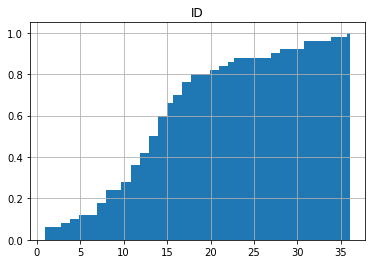

In [3]:
ddf.groupby('tenure').agg({'ID':'count'}).hist(cumulative=True, density=1, bins=100)